![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


  # **Cortex Game: Round2--Probability of Giving**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
from google.colab import drive
import os

my_folder = "/content/drive/MyDrive/InteligenciaArtificial_CienciaDatos"
drive.mount('/content/drive')

os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/InteligenciaArtificial_CienciaDatos


**1- Make sure that your Python version is 3.3 or higher**

In [2]:
from platform import python_version
print (python_version())

3.8.15


**2- Install SASPy**

In [5]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 28.8 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=7aeb38e28b932a438f6fb1daccad8c2884d8d752d50ff991c913fdf77ed3b0f1
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Make sure that the configuration file "sascfg_personal.py" is correctly created**

In [3]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


In [6]:
import saspy
print(saspy.__file__.replace('__init__.py', 'sascfg_personal.py'))

/usr/local/lib/python3.8/dist-packages/saspy/sascfg_personal.py


**4- Create your .authinfo**

In [7]:
%%writefile .authinfo
oda user A00829022@tec.mx  password JasoueLasavo21.

Overwriting .authinfo


In [8]:
!cp .authinfo ~/.authinfo

**4- Establish Connection (Need to do this step each time you use SASPy)**

In [9]:
sas_session = saspy.SASsession()
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 356



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/InteligenciaArtificial_CienciaDatos/sascfg_personal.py
WORK Path             = /saswork/SAS_work9D430001FED2_odaws01-usw2.oda.sas.com/SAS_workF2720001FED2_odaws01-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 130770


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [10]:
ps = sas_session.submit("""libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';""")
print(ps["LOG"])


5                                                          The SAS System                      Sunday, December  4, 2022 02:04:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
27         
28         
29         ods html5 (id=saspy_internal) close;ods listing;
30         

6                                                          The SAS System                      Sunday, December  4, 2022 02:04:00 AM

31         


### Transform cloud SAS dataset to Python dataframe (pandas)

For reference: 

1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)


2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [11]:
import pandas as pd
data1 = sas_session.sasdata2dataframe(table='hist', libref='cortex')
data2 = sas_session.sasdata2dataframe(table='target_rd2', libref='cortex')

## Merge the Data

In [12]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(4)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
956742,2956743.0,POWER,LINDA,1.0,51.0,84400.0,University / College,City,9.0,4.0,...,2.0,8.0,130.0,30.0,100.0,0.0,0.0,1.0,0.0,0.0
176479,2176480.0,RICHMAN,BARBARA,1.0,60.0,124500.0,High School,Rural,9.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
816119,2816120.0,SCHWER,JOE,0.0,22.0,17900.0,University / College,Downtown,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
992287,2992288.0,GROOVER,HILLARY,1.0,27.0,49700.0,University / College,Suburban,10.0,3.0,...,3.0,6.0,295.0,20.0,250.0,0.0,0.0,1.0,1.0,20.0


## Treating Missing Values

Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [13]:
# Define as 0 missing values of: MinGift, MaxGift and TotalGift
data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)
data_merge[['MaxGift']] = data_merge[['MinGift']].fillna(value=0)
data_merge[['TotalGift']] = data_merge[['MinGift']].fillna(value=0)

In [14]:
# Dummy variables for City and Education
data_merge.loc[data_merge["Education"] == "Elementary", "Education"] = 0
data_merge.loc[data_merge["Education"] == "High School", "Education"] = 1
data_merge.loc[data_merge["Education"] == "University / College", "Education"] = 2

dummies = pd.get_dummies(data_merge['City'], drop_first = True)
data_merge = pd.concat([data_merge, dummies], axis = 1)
data_merge = data_merge.drop(columns=['City'])
data_merge.sample(4)

,ID,LastName,FirstName,Woman,Age,Salary,Education,SeniorList,NbActivities,Referrals,...,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Downtown,Rural,Suburban
454426,2454427.0,WEICHBRODT,AARON,0.0,41.0,150900.0,2,3.0,1.0,0.0,...,500.0,500.0,0.0,0.0,0.0,0.0,0.0,0,1,0
879299,2879300.0,KO,SUE,1.0,63.0,15300.0,2,6.0,2.0,0.0,...,30.0,30.0,1.0,10.0,1.0,0.0,0.0,0,0,0
341194,2341195.0,DUNIGAN,DOROTHY,1.0,81.0,29800.0,1,5.0,2.0,0.0,...,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0,0,1
402281,2402282.0,MILLER,SAMUEL,0.0,60.0,43700.0,2,2.0,0.0,0.0,...,0.0,0.0,1.0,30.0,0.0,0.0,0.0,0,0,0


## Data Partition

In [15]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.4, random_state=12345) 
train.sample(4)

,ID,LastName,FirstName,Woman,Age,Salary,Education,SeniorList,NbActivities,Referrals,...,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Downtown,Rural,Suburban
182777,2182778.0,HALLOCK,THOMAS,0.0,26.0,211300.0,2,6.0,1.0,4.0,...,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0,0,0
804843,2804844.0,PINEDA,LUCY,1.0,90.0,28500.0,2,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
956632,2956633.0,RUIZ,THERESA,1.0,31.0,51900.0,2,10.0,4.0,3.0,...,20.0,20.0,1.0,20.0,0.0,1.0,200.0,1,0,0
571241,2571242.0,TEMPLE,SHIRLEY,1.0,70.0,35200.0,1,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


# Prebuilt Models

The sk-learn library offers more advanced models. 

sk-learn library: https://scikit-learn.org/stable/index.html  

## Neural Network Model

In [52]:
from sklearn.linear_model import LogisticRegression

X_train = train[['Age', 'Salary','MinGift', 'GaveLastYear','Contact', 'Woman', 'NbActivities', 'TotalGift']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'GaveLastYear','Contact', 'Woman', 'NbActivities', 'TotalGift']] 
Y_valid = validation['GaveThisYear']

# Scaling data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_valid = scaler.transform(X_valid) 

# Apply model
from sklearn.neural_network import MLPClassifier
neuralNet = MLPClassifier(hidden_layer_sizes=(10,7,3), max_iter=15, activation='relu', solver='adam')
neuralNet.fit(X_train,Y_train)
neuralNet_predict = neuralNet.predict(X_valid)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
# Confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, neuralNet_predict)
print(confusion_matrix)

[[336829   3384]
 [ 54253   5534]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, neuralNet_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    340213
         1.0       0.62      0.09      0.16     59787

    accuracy                           0.86    400000
   macro avg       0.74      0.54      0.54    400000
weighted avg       0.83      0.86      0.81    400000



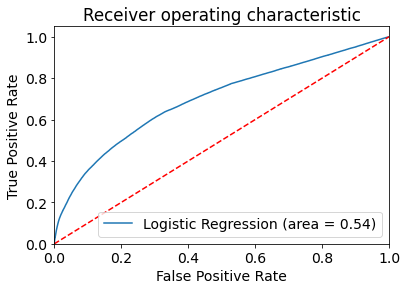

In [55]:
# Graphic of results
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

plt.rc("font", size=14)
logit_roc_auc = roc_auc_score(Y_valid, neuralNet.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, neuralNet.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Decision Tree Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

X_train = train[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities', 'TotalGift']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities', 'TotalGift']] 
Y_valid = validation['GaveThisYear']

# Apply model
DT_model = DecisionTreeClassifier(max_depth=5, criterion="entropy").fit(X_train,Y_train)
# Predictions on testing data
DT_predict_proba = DT_model.predict_proba(X_valid) 
DT_predict = DT_model.predict(X_valid) 
# Probabilities for each class
DT_probs = DT_model.predict_proba(X_valid)[:, 1]
print(DT_probs)

[0.11072745 0.1603026  0.40548953 ... 0.07729761 0.63065804 0.10409085]


In [21]:
# Confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, DT_predict)
print(confusion_matrix)

[[335707   4506]
 [ 52949   6838]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    340213
         1.0       0.60      0.11      0.19     59787

    accuracy                           0.86    400000
   macro avg       0.73      0.55      0.56    400000
weighted avg       0.82      0.86      0.81    400000



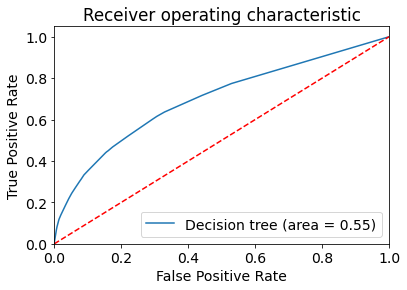

In [32]:
# Graphic of results
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

plt.rc("font", size=14)
DT_roc_auc = roc_auc_score(Y_valid, DT_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DT_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

### *Other models may also be helpful for this game*

Reference: https://scikit-learn.org/stable/supervised_learning.html
    

## Scoring New Data

### Prepare data for scoring

In [33]:
data3 = sas_session.sasdata2dataframe(table='score', libref='cortex')
data4 = sas_session.sasdata2dataframe(table='score_rd2_contact', libref='cortex')
data5 = sas_session.sasdata2dataframe(table='SCORE_RD2_NOCONTACT', libref='cortex')

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the Decision Tree model performed better than the Neural Network model based on the AUC criterion.

### Predict 'probability of giving' for members who were contacted

In [29]:
# Merge data
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Define as 0 missing values of: MinGift, MaxGift and TotalGift
scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0)
scoring_data_contact[['MaxGift']] = scoring_data_contact[['MinGift']].fillna(value=0)
scoring_data_contact[['TotalGift']] = scoring_data_contact[['MinGift']].fillna(value=0)

# Dummy variables for City and Education
scoring_data_contact.loc[scoring_data_contact["Education"] == "Elementary", "Education"] = 0
scoring_data_contact.loc[scoring_data_contact["Education"] == "High School", "Education"] = 1
scoring_data_contact.loc[scoring_data_contact["Education"] == "University / College", "Education"] = 2

dummies = pd.get_dummies(scoring_data_contact['City'], drop_first = True)
scoring_data_contact = pd.concat([scoring_data_contact, dummies], axis = 1)
scoring_data_contact = scoring_data_contact.drop(columns=['City'])

# Scoring data, prediction of probabilities
X = scoring_data_contact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities', 'TotalGift']] 
DT_predict_contact = DT_model.predict_proba(X)[:,1]
scoring_data_contact['Prediction_prob'] = DT_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()

,ID,ProbContact
0,2000001.0,0.289052
1,2000002.0,0.630658
2,2000003.0,0.630658
3,2000004.0,0.378129
4,2000005.0,0.527542


### Predict 'probability of giving' for members who were not contacted

In [34]:
# Merge data
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Define as 0 missing values of: MinGift, MaxGift and TotalGift
scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0)
scoring_data_nocontact[['MaxGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0)
scoring_data_nocontact[['TotalGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0)

# Dummy variables for City and Education
scoring_data_nocontact.loc[scoring_data_nocontact["Education"] == "Elementary", "Education"] = 0
scoring_data_nocontact.loc[scoring_data_nocontact["Education"] == "High School", "Education"] = 1
scoring_data_nocontact.loc[scoring_data_nocontact["Education"] == "University / College", "Education"] = 2

dummies = pd.get_dummies(scoring_data_nocontact['City'], drop_first = True)
scoring_data_nocontact = pd.concat([scoring_data_nocontact, dummies], axis = 1)
scoring_data_nocontact = scoring_data_nocontact.drop(columns=['City'])

# Scoring data, prediction of probabilities
X = scoring_data_nocontact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities', 'TotalGift']] 
DT_predict_nocontact = DT_model.predict_proba(X)[:,1]
scoring_data_nocontact['Prediction_prob'] = DT_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,ProbNoContact
0,2000001.0,0.110727
1,2000002.0,0.104091
2,2000003.0,0.077298
3,2000004.0,0.077298
4,2000005.0,0.077298


In [35]:
# Show results
result_Prob = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Prob.sort_values(by=['ID'], inplace=True)
result_Prob.sample(10)

,ID,ProbContact,ProbNoContact
696630,2696631.0,0.630658,0.077298
830745,2830746.0,0.289052,0.077298
319818,2319819.0,0.332331,0.077298
971282,2971283.0,0.283237,0.110727
549075,2549076.0,0.367328,0.077298
168073,2168074.0,0.630658,0.110727
147996,2147997.0,0.283237,0.110727
962010,2962011.0,0.378129,0.110727
870305,2870306.0,0.289052,0.077298
679766,2679767.0,0.367328,0.077298


## Exporting Results to a CSV File

In [36]:
result_Prob.to_csv('Round2_Output_prob.csv', index=False)

In [37]:
import pandas as pd

NB = 250000
probabilities = pd.read_csv("Round2_Output_prob.csv")
amounts = pd.read_csv("Round2_Output_amt.csv")

def Calc_Uplift(raw_data):
    return ((raw_data['AmtContact']*raw_data['ProbContact']) - (raw_data['AmtNoContact']*raw_data['ProbNoContact']))

raw_submission = pd.merge(probabilities, amounts, on=["ID"], how="right")
raw_submission["Uplift"] = raw_submission.apply(lambda row: Calc_Uplift(row), axis=1)

# Sorting data by descending Uplift value
raw_submission.sort_values(by=['Uplift'], ascending=False, inplace=True)


In [38]:
# Export the final csv file
submission = raw_submission.head(NB)
submission.to_csv('Round2 Output final.csv', index=False)


In [39]:
Result1= raw_submission['ID']
NB = 250000
submission = Result1.head(NB)
submission.to_csv('Round2 Output final IDs.csv', index=False)